In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

In [3]:
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise

In [4]:
%matplotlib inline

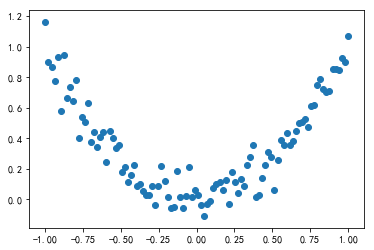

In [6]:
plt.scatter(x, y)

In [7]:
with tf.variable_scope("Inputs"):
    tf_x = tf.placeholder(tf.float32, x.shape, name="x")
    tf_y = tf.placeholder(tf.float32, y.shape, name="y")

In [8]:
with tf.variable_scope("Net"):
    l1 = tf.layers.dense(tf_x, 10, tf.nn.relu, name="hidden_layer")
    output = tf.layers.dense(l1, 1, name="output_layer")
    
    # add to histogram summary
    tf.summary.histogram("h_out", l1)
    tf.summary.histogram("pred", output)

In [9]:
loss = tf.losses.mean_squared_error(tf_y, output, scope="loss")
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
tf.summary.scalar("loss", loss)

<tf.Tensor 'loss_1:0' shape=() dtype=string>

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./log", sess.graph)
    merge_op = tf.summary.merge_all()
    for step in range(100):
        _, result = sess.run([train_op, merge_op], {tf_x: x, tf_y: y})
        writer.add_summary(result, step)

In [ ]:
# Lastly, in your terminal or CMD, type this :
# $ tensorboard --logdir path/to/log